<a href="https://colab.research.google.com/github/Docasti/Python-ciencia-datos/blob/main/Trabajo_Pr%C3%A1ctico_N%C2%B02_REDES_NEURONALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO PRÁCTICO- REDES NEURONALES***




Grupo N° 25

Integrantes:

Castillo Dora Cristina, DNI 24452605, yo_adonis@outlook.com

Centurión, Johana Alexia; DNI 35897389; johanacent@gmail.com

Larrea , Hugo Carlos ; DNI 29437229 ; charly233@gmail.com

Se les proporcionará una base de datos de ciudades de Argentina y los registros de Máxima y Mínima temperatura a lo largo de un año. Dicha base de datos fue obtenida del registro nacional de las siguientes enlaces: [detalle de la base de datos](https://datos.gob.ar/dataset/smn-registro-temperatura-365-dias/archivo/smn_5.1) - [REGISTRO DE TEMPERATURA 365 DIAS](https://www.smn.gob.ar/descarga-de-datos).

La base de datos también podra ser descargada del siguiente enlace del drive [BASE DE DATOS](https://drive.google.com/drive/folders/18rTLeY5A8DOwz39TB563HPHIpZTJM3CA?usp=sharing)

Se deberá ralizar los siguientes pasos.


1.   Seleccionar una ciudad y reconstruir una nueva base de datos tomando la temperatura promedio entre la máx y mán de cada día, para dicha ciudad. Graficar dichos datos TIEMPO VS TEMPERATURA Y SELECCIONAR UN PERIODO DE TIEMPO DONDE LA GRÁFICA SEA CRECIENTE. Esto servirá para construir una nueva base de datos.


2.  Agregar a la nueva base de datos creada del insciso anterior una columna con las siguientes variables , generadas a través de simulación aleatoria:


   * VARIABLE: PRECIO DEL KILO DE HELADO- construir esta variable usando simulación aleatoria de regresión lineal en función de la temperatura. De manera que a mayor temperatura el precio sea MAYOR,  a menor temperatura el precio será menor. Definir el  rango del precio del helado y la tasa o porcentaje de incremento del precio
  
   * COMPRA HELADO: VARIABLE CATEGÓRICA , RESPUESTA SI/NO. Generar esta variable con simulación aleatoria de manera que si el precio del helado es mas del 40 % del precio inicial, la persona decide NO COMPRAR EL HELADO, ESTO SUCEDE CON UNA PROPORCION O PROBABILIDAD DEL 80% DE LA CANTIDAD TOTAL DE REGISTROS.

3. GENERAR TRES  PERCEPTRONES (SEGUIR LOS EJEMPLOS MOSTRADOS DE PERCEPTRON EN CLASE) CONECTADOS ENTRE SI DE MANERA QUE TENGA COMO CONDICIÓN LO SIGUIENTE:

  * SI HACEN MÁS DE 27 GRADOS DE TEMPERATURA O INCLUSIVE SI EL PRECIO DEL HELADO ESTA POR DEBAJO DEL 40 % DE INCREMENTO, LA RED NEURONAL DEBERA INDICAR QUE SE COMPRA EL HELADO. (los pesos colocarlos de manera aleatoria, usar la función de salto finito o función sigmoide para la activación)

4. Luego de diseñar los perceptrones, implementarlos sobre la base de datos generada de manera que se les pase por argumento las variables: TEMPERATURA PROMEDIO, PRECIO DEL HELADO. Comparar la proporción de respuestas correctas en las que coincide el resultado de la red neuronal , con la variable COMPRA HELADOS . Esto último es una forma de medir la exactitud de la red.

In [ ]:
# EJERCICIO 1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con nombres de columnas y renombrar columnas
df = pd.read_csv('/content/registro_temperatura365.csv')

mask = df['NOMBRE'] == 'EZEIZA AERO' #Seleccionamos la ciudad de Ezeiza

df = df[mask] # Construimos nuestra base de datos, tomamos en cuenta solo la ciudad elegida

ezeiza_data = df # Copiamos nuestro df, renombramos como ezeiza_data, y a partir de ahora trabajamos con este

display(ezeiza_data.info()) # Con esto verificamos que todos los valores en Tmáx y Tmín son numéricos

print("\n--------------- EZEIZA DATA --------------")

ezeiza_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 34 to 43594
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FECHA   365 non-null    object 
 1   TMAX    365 non-null    float64
 2   TMIN    365 non-null    float64
 3   NOMBRE  365 non-null    object 
dtypes: float64(2), object(2)
memory usage: 14.3+ KB


None


--------------- EZEIZA DATA --------------


,FECHA,TMAX,TMIN,NOMBRE
34,29-10-23,25.0,15.1,EZEIZA AERO
153,28-10-23,29.5,16.2,EZEIZA AERO
272,27-10-23,28.5,16.6,EZEIZA AERO
391,26-10-23,24.5,10.8,EZEIZA AERO
510,25-10-23,21.0,6.0,EZEIZA AERO


,FECHA,TMAX,TMIN,NOMBRE,TEMP_PROMEDIO
34,2023-10-29,25.0,15.1,EZEIZA AERO,20.05
153,2023-10-28,29.5,16.2,EZEIZA AERO,22.85
272,2023-10-27,28.5,16.6,EZEIZA AERO,22.55
391,2023-10-26,24.5,10.8,EZEIZA AERO,17.65
510,2023-10-25,21.0,6.0,EZEIZA AERO,13.50


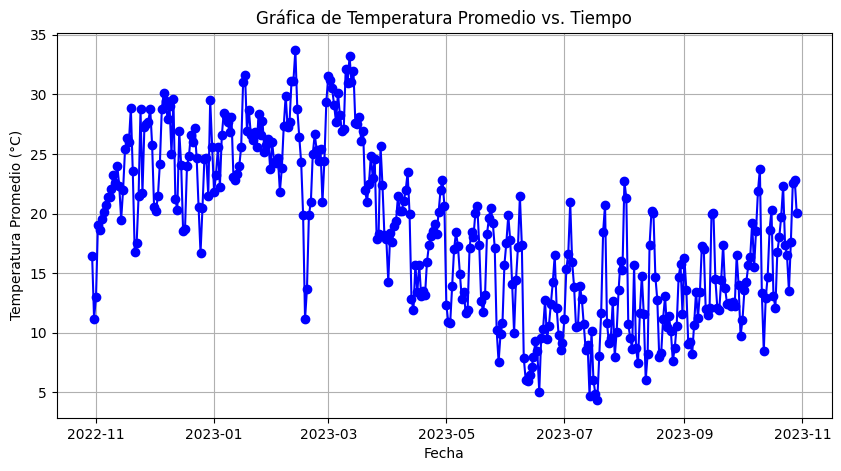

In [ ]:
#Calculamos la temperatura promedio diaria
ezeiza_data['TEMP_PROMEDIO'] = (ezeiza_data['TMAX'] + ezeiza_data['TMIN']) / 2

#Convertir la columna 'FECHA' a tipo datetime
ezeiza_data['FECHA'] = pd.to_datetime(ezeiza_data['FECHA'], format='%d-%m-%y')

display(ezeiza_data.head(5))

# Crear una gráfica de tiempo vs. temperatura, esto es general, para luego poder elegir el pediodo:
plt.figure(figsize=(10, 5))
plt.plot(ezeiza_data['FECHA'], ezeiza_data['TEMP_PROMEDIO'], marker='o', linestyle='-', color='b')
plt.title('Gráfica de Temperatura Promedio vs. Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.grid(True)

In [ ]:
# Seleccionar el período deseado
start_date = '2022-12-25'
end_date = '2023-02-10'
period_selec = ezeiza_data[(ezeiza_data['FECHA'] >= start_date) & (ezeiza_data['FECHA'] <= end_date)]

# Construir una nueva base de datos con el período seleccionado
period_selec.to_csv('/content/ezeiza_period_selec.csv', index=False)

# Imprimir información del DataFrame resultante
print(f'\nLa información del DF para el período seleccionado es: \n')
display(period_selec.info())

period_selec.head(10)


La información del DF para el período seleccionado es: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 31217 to 36842
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   FECHA          48 non-null     datetime64[ns]
 1   TMAX           48 non-null     float64       
 2   TMIN           48 non-null     float64       
 3   NOMBRE         48 non-null     object        
 4   TEMP_PROMEDIO  48 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.2+ KB


None

,FECHA,TMAX,TMIN,NOMBRE,TEMP_PROMEDIO
31217,2023-02-10,38.1,24.1,EZEIZA AERO,31.10
31335,2023-02-09,36.6,18.8,EZEIZA AERO,27.70
31453,2023-02-08,31.8,22.7,EZEIZA AERO,27.25
31571,2023-02-07,36.6,23.2,EZEIZA AERO,29.90
31689,2023-02-06,35.4,19.3,EZEIZA AERO,27.35
31807,2023-02-05,32.5,15.1,EZEIZA AERO,23.80
31924,2023-02-04,29.6,14.1,EZEIZA AERO,21.85
32042,2023-02-03,30.7,18.6,EZEIZA AERO,24.65
32161,2023-02-02,28.1,20.4,EZEIZA AERO,24.25
32280,2023-02-01,29.4,19.3,EZEIZA AERO,24.35


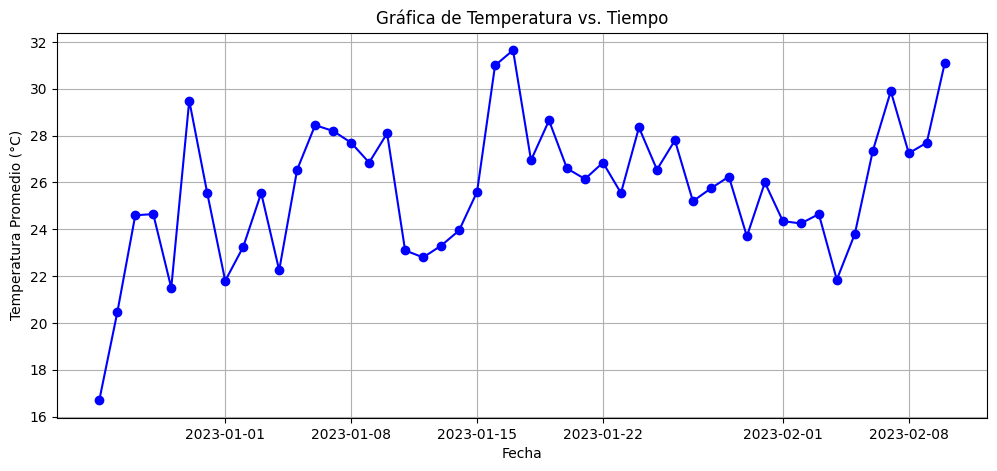

In [ ]:
# Crear una gráfica de tiempo vs. temperatura, para el periodo seleccionado:
# Esto es mas que nada para verificar que el periodo seleccionado sea de temperatura creciente

plt.figure(figsize=(12, 5))
plt.plot(period_selec['FECHA'], period_selec['TEMP_PROMEDIO'], marker='o', linestyle='-', color='b')
plt.title('Gráfica de Temperatura vs. Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Promedio (°C)')
plt.grid(True)

In [ ]:
#     EJERCICIO 2
#  PRECIO HELADO; precios y la tasa de incremento
precio_min = 5  # Precio mínimo del kilo de helado
precio_max = 15  # Precio máximo del kilo de helado
incremento_porcentaje = 0.05  # Tasa de incremento del precio por cada grado de temperatura

# Calcular el precio del kilo de helado en función de la temperatura
period_selec['TEMPERATURA'] = period_selec['TEMP_PROMEDIO']  # Copiar la temperatura a otra columna
period_selec['PRECIO_HELADO'] = precio_min + (period_selec['TEMPERATURA'] * incremento_porcentaje)

# "COMPRA HELADO"
#  probabilidad de NO compra
probabilidad_no_compra = 0.8
total_registros = len(period_selec)
registros_no_compra = int(total_registros * probabilidad_no_compra)
#  decisiones de compra (NO COMPRA) y compra (COMPRA)
decisiones = ['NO COMPRA'] * registros_no_compra + ['COMPRA'] * (total_registros - registros_no_compra)
np.random.shuffle(decisiones)  # Mezclar aleatoriamente las decisiones

# Agregar la columna "COMPRA_HELADO" al DataFrame
period_selec['COMPRA_HELADO'] = decisiones

# Guardar el DataFrame actualizado
period_selec.to_csv('/content/ezeiza_period_selec_con_variables.csv', index=False)


In [ ]:
#     EJERCICIO  3
import numpy as np

def activacion(x):
    return np.maximum(0, x)

pesos = np.array([1, 1, 1])  # Pesos para todas las entradas
umbrales = np.array([0, -28, -12])


# Función que toma la temperatura y el precio del helado como entrada y devuelve la decisión de compra
def decision_compra(temperatura, precio_helado):
    entrada = np.array([1, temperatura, precio_helado])  # Agregar sesgo (bias) como entrada
    salidas = [activacion(np.dot(pesos[i], entrada) - umbrales[i]) for i in range(3)]

    # Si al menos uno de los perceptrones indica compra, entonces se compra el helado
    if np.any(salidas):
        return 'COMPRA'
    else:
        return 'NO COMPRA'


# Simulación de temperaturas y precios de helado
temperatura = 28  # Ejemplo de temperatura
precio_helado = 12  # Ejemplo de precio del helado

# Tomar una decisión de compra basada en la temperatura y el precio del helado
decision = decision_compra(temperatura, precio_helado)
print(f'Decisión de compra: {decision}')

Decisión de compra: COMPRA


In [ ]:
# EJERCICIO   4
#  contemperatura promedio y el precio del helado como argumentos y devuelve la decisión de compra
def decision_compra(temperatura, precio_helado):
    entrada = np.array([1, temperatura, precio_helado])  # Agregar sesgo (bias) como entrada
    salidas = [activacion(np.dot(pesos[i], entrada) - umbrales[i]) for i in range(3)]

    # Si al menos uno de los perceptrones indica compra, entonces se compra el helado
    if np.any(salidas):
        return 'COMPRA'
    else:
        return 'NO COMPRA'

# Aplicar la función a cada fila de la base de datos
base_de_datos = pd.read_csv('/content/ezeiza_period_selec_con_variables.csv')
base_de_datos['DECISION_RED'] = base_de_datos.apply(lambda row: decision_compra(row['TEMPERATURA'], row['PRECIO_HELADO']), axis=1)

# Comprobar si todas las decisiones de la red son 'NO COMPRA' y si todas las respuestas reales son 'COMPRA'
if (base_de_datos['DECISION_RED'] == 'NO COMPRA').all() and (base_de_datos['COMPRA_HELADO'] == 'COMPRA').all():
    proporcion_correctas = 1.0  # 100% de respuestas correctas
else:
    proporcion_correctas = (base_de_datos['DECISION_RED'] == base_de_datos['COMPRA_HELADO']).mean()

print(f'Proporción de respuestas correctas: {proporcion_correctas:.2%}')






Proporción de respuestas correctas: 20.83%
